# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
prevre = pd.read_csv('previsao_de_renda.csv', index_col=0)
prevre.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [6]:
prevre.dtypes

data_ref                  object
index                      int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
mau                         bool
renda                    float64
dtype: object

In [7]:
prevre.isna().sum()

data_ref                    0
index                       0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2534
qt_pessoas_residencia       0
mau                         0
renda                       0
dtype: int64

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

In [9]:
prevre_c1 = pd.get_dummies(prevre, columns=['sexo', 'posse_de_veiculo','posse_de_imovel', 'mau'], drop_first=True, dtype='int')
prevre_c1.head()

,data_ref,index,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_M,posse_de_veiculo_True,posse_de_imovel_True,mau_True
0,2015-01-01,8682,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,3369.24,0,0,1,0
1,2015-01-01,12830,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,6096.14,1,1,1,0
2,2015-01-01,2885,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,5658.98,1,1,1,0
3,2015-01-01,16168,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,7246.69,0,1,0,0
4,2015-01-01,12438,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,4017.37,1,0,0,0


In [10]:
prevre_c2 = prevre_c1.drop(columns=['data_ref', 'index', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'])
prevre_c2.head()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_M,posse_de_veiculo_True,posse_de_imovel_True,mau_True
0,1,36,3.575342,3.0,3369.24,0,0,1,0
1,0,42,0.860274,2.0,6096.14,1,1,1,0
2,2,31,8.065753,4.0,5658.98,1,1,1,0
3,0,50,1.208219,2.0,7246.69,0,1,0,0
4,0,52,13.873973,2.0,4017.37,1,0,0,0


In [11]:
prevre_c2.columns = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda', 'sexo_m', 'tem_posse_de_veiculo', 'tem_posse_de_imovel','devedor']
prevre2 = prevre_c2
prevre2.head()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_m,tem_posse_de_veiculo,tem_posse_de_imovel,devedor
0,1,36,3.575342,3.0,3369.24,0,0,1,0
1,0,42,0.860274,2.0,6096.14,1,1,1,0
2,2,31,8.065753,4.0,5658.98,1,1,1,0
3,0,50,1.208219,2.0,7246.69,0,1,0,0
4,0,52,13.873973,2.0,4017.37,1,0,0,0


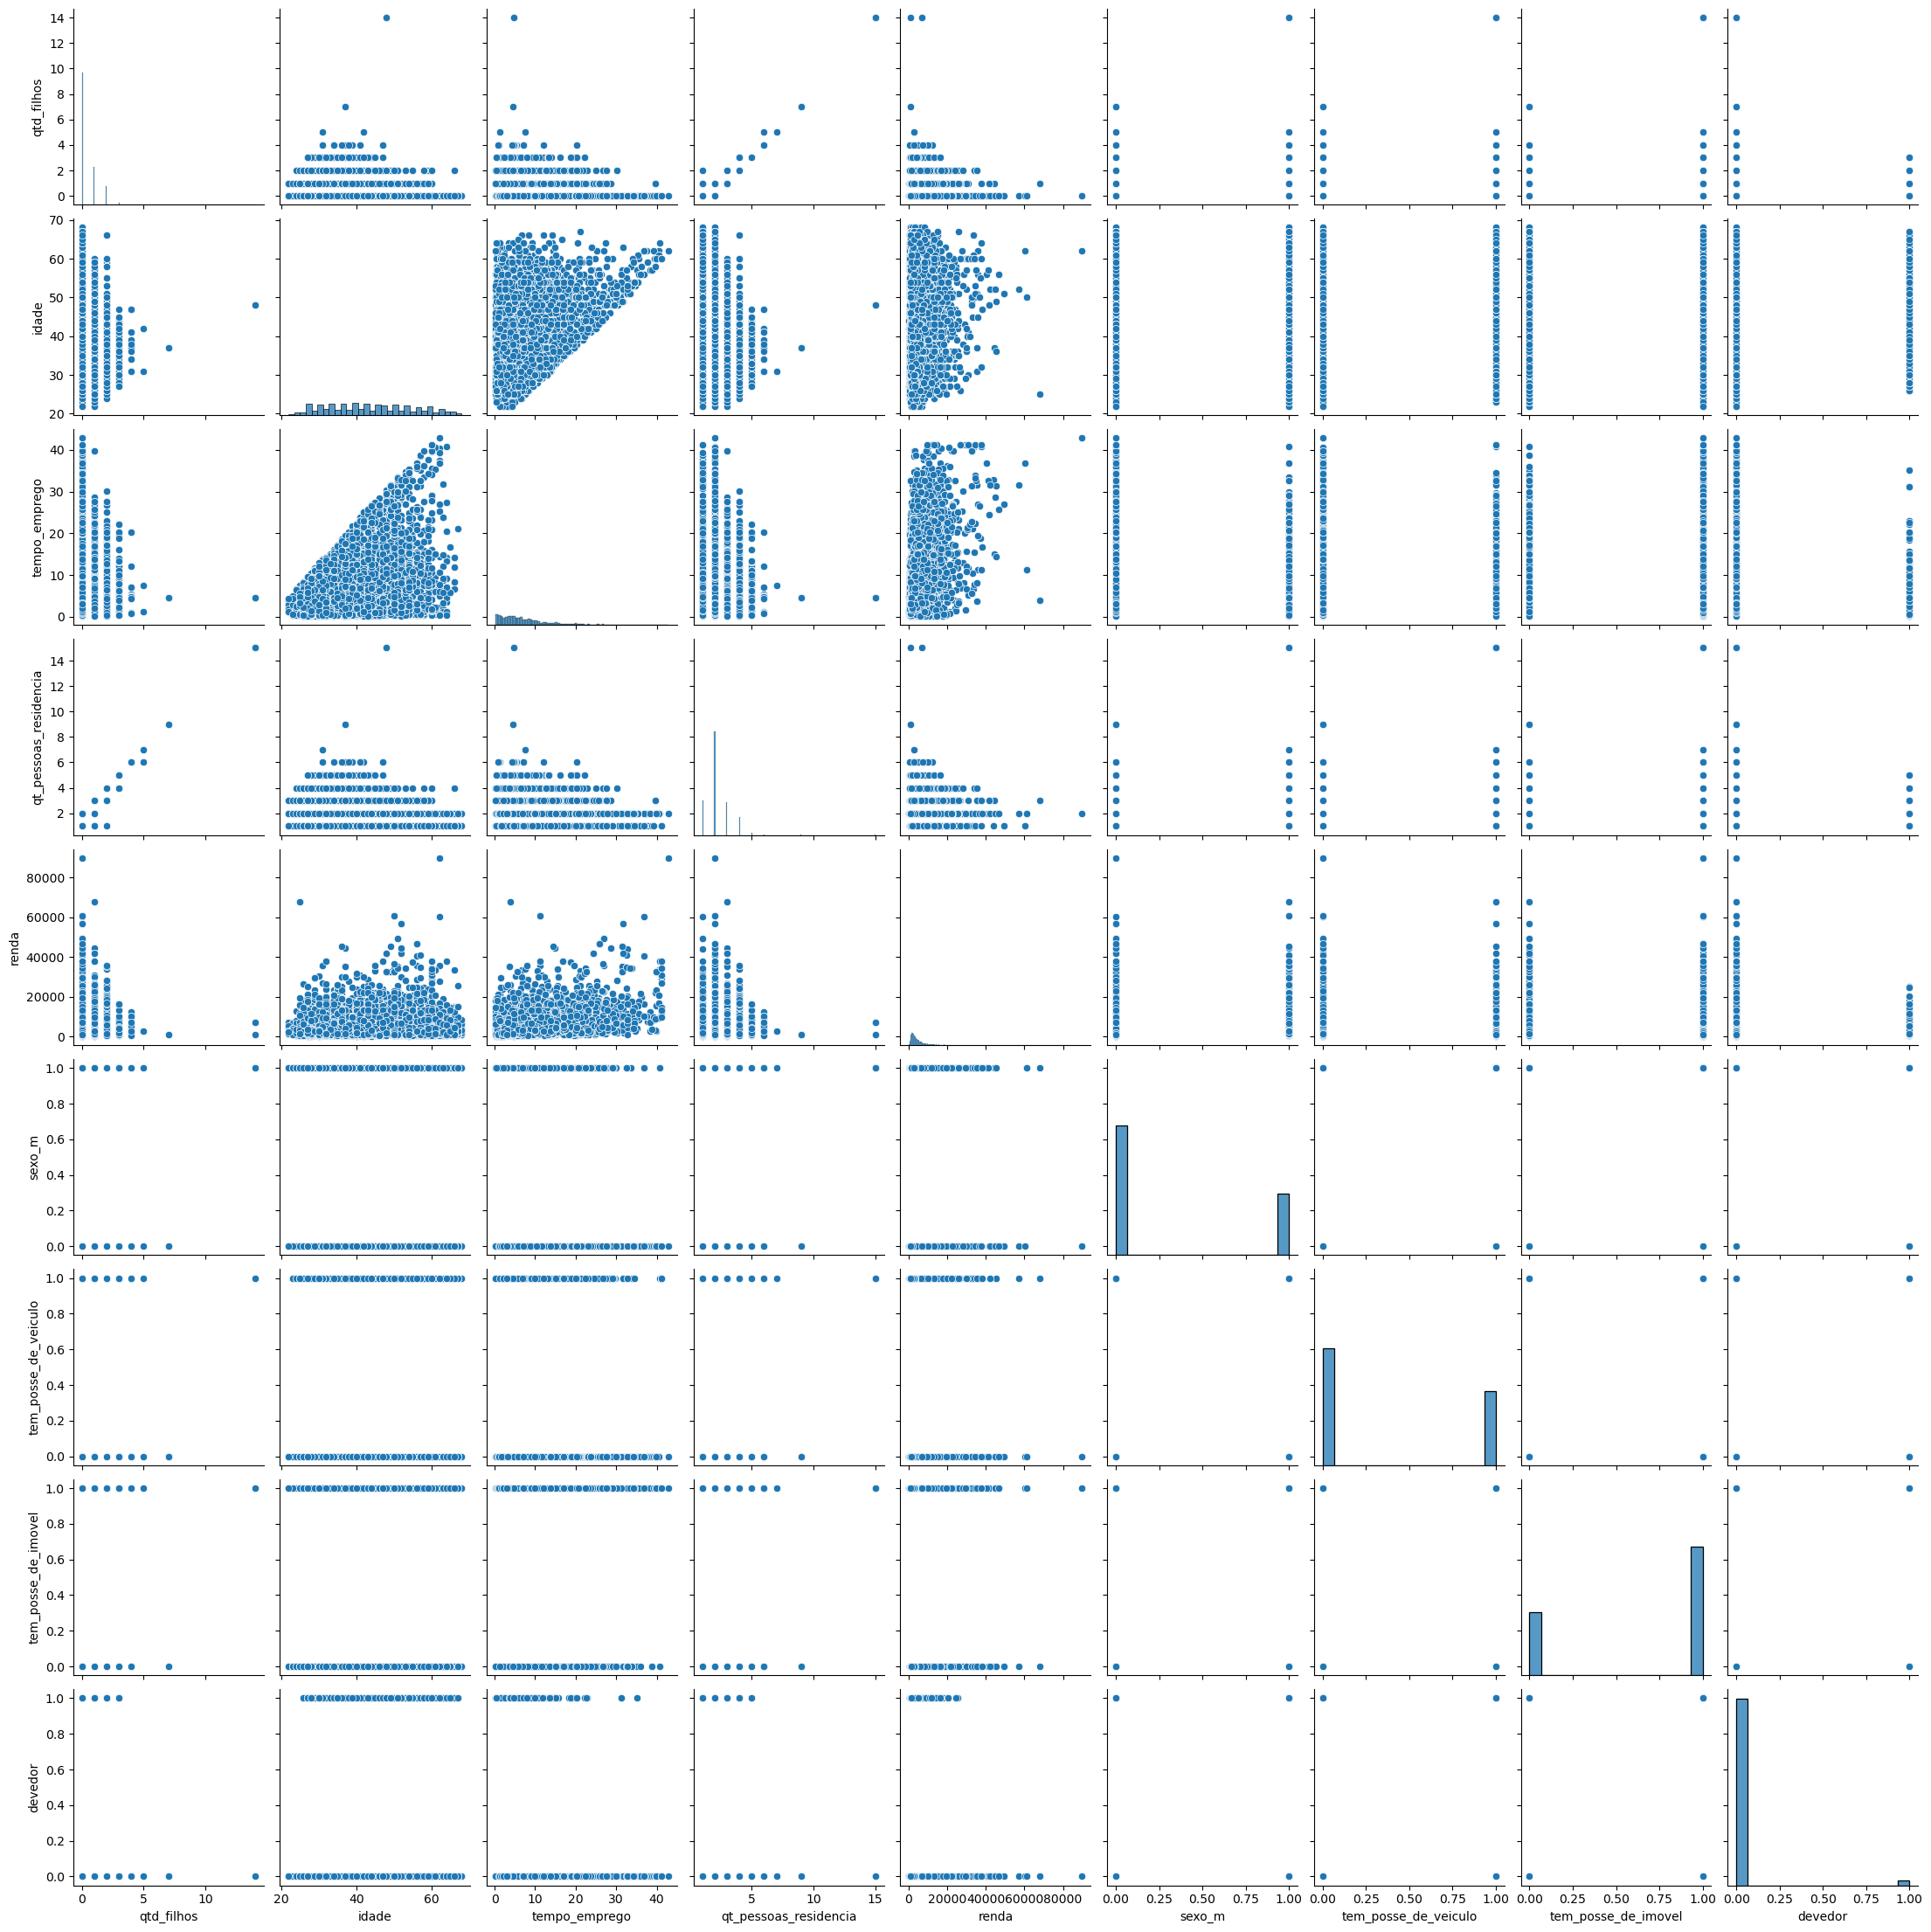

In [12]:
sns.pairplot(data = prevre2)

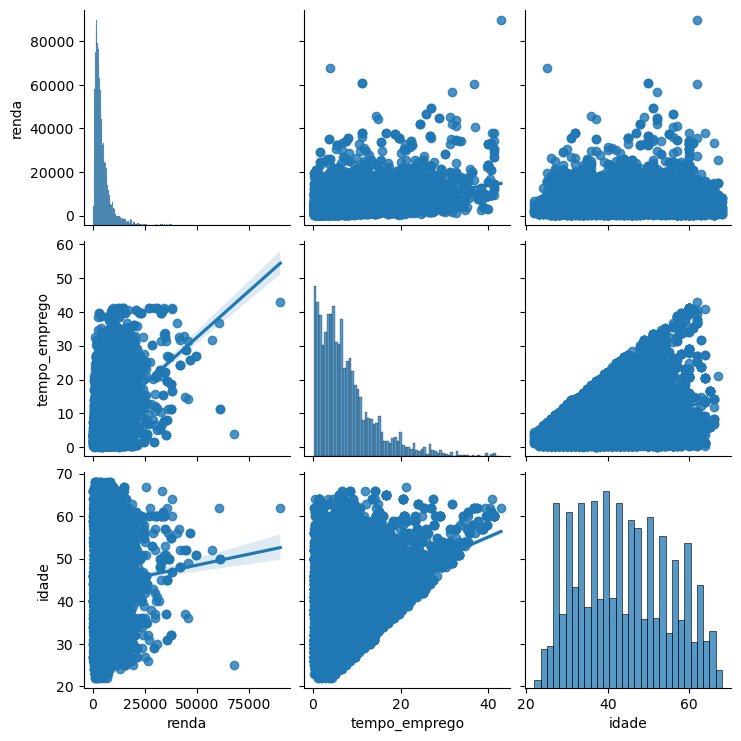

In [58]:
sns.pairplot(data = prevre2[['renda','tempo_emprego','idade']], kind='reg')

- É possivel notar as relações entre, a idade, o tempo de emprego e renda, mostrando quanto mais se envelhece trabalhando, maior a renda.

3) Na su aopinião, há outliers na variável renda?

<Axes: >

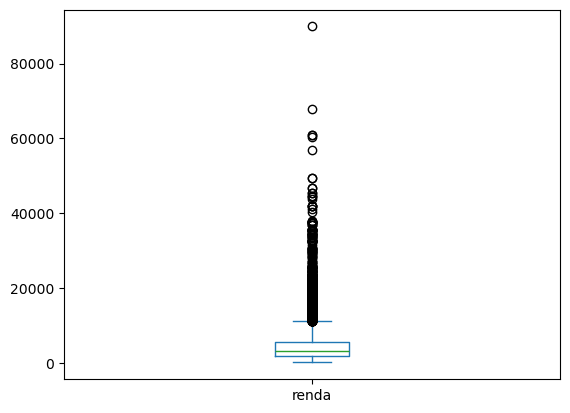

In [64]:
prevre2.renda.plot(kind='box')

- Sim, existe uma descrepância em relacao ao corpo do boxplot

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [71]:
prevre2.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_m,tem_posse_de_veiculo,tem_posse_de_imovel,devedor
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567,0.126175,0.107959,-0.002525,0.009544
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570,-0.218183,-0.157837,0.122667,-0.011087
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235,-0.146123,-0.087514,0.000112,-0.047722
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977,0.159661,0.156009,-0.007180,-0.001555
renda,0.009567,0.042570,0.394235,0.020977,1.000000,0.180722,0.063414,0.029827,-0.011577
sexo_m,0.126175,-0.218183,-0.146123,0.159661,0.180722,1.000000,0.373288,-0.044192,0.010563
tem_posse_de_veiculo,0.107959,-0.157837,-0.087514,0.156009,0.063414,0.373288,1.000000,-0.014727,-0.017617
tem_posse_de_imovel,-0.002525,0.122667,0.000112,-0.007180,0.029827,-0.044192,-0.014727,1.000000,-0.022499
devedor,0.009544,-0.011087,-0.047722,-0.001555,-0.011577,0.010563,-0.017617,-0.022499,1.000000


<Axes: >

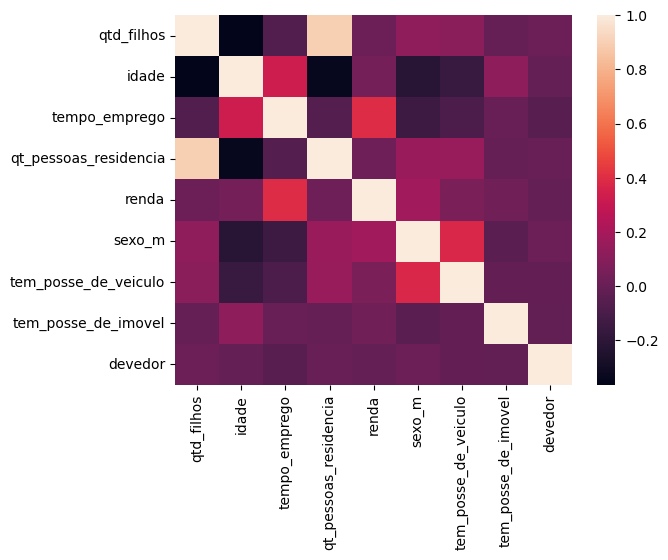

In [73]:
sns.heatmap(prevre2.corr())

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

- Melhorou, junto com o heatmap, é possivel ver quais pares tem uma maior influência sobre o outro, tanto positivo, quanto negatico.